In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load your preprocessed,
df = pd.read_csv("data_model_preprocessing-PBA.csv")

print("Shape:", df.shape)
print(df.head())
print(df.columns)


Shape: (122557, 31)
   WeekendOrder  Processing.Days   Distance_km  `Order Item Product Price`  \
0             0              3.0  18500.760815                      327.75   
1             1              3.0  11640.755465                      327.75   
2             1              2.0  16576.993966                      327.75   
3             1              6.0  15192.036863                      327.75   
4             1              2.0  15431.281031                      327.75   

   `Order Item Quantity`  `Order Item Discount Rate`  `Order Region`Caribbean  \
0                      1                        0.04                        0   
1                      1                        0.07                        0   
2                      1                        0.09                        0   
3                      1                        0.10                        0   
4                      1                        0.12                        0   

   `Order Region`Central

In [24]:
target_col = "Late_delivery_risk"

# All other columns are features
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols].copy()
y= df[target_col].copy()

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Unique target values:", y.unique())


Feature shape: (122557, 30)
Target shape: (122557,)
Unique target values: [0 1]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 80/20 split
    stratify=y,          # keep same proportion of 0/1 in both splits
    random_state=42      # for reproducibility
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target distribution:\n", np.bincount(y_train))
print("Test target distribution:\n", np.bincount(y_test))


Train shape: (98045, 30) Test shape: (24512, 30)
Train target distribution:
 [44257 53788]
Test target distribution:
 [11064 13448]


### Feature Importance and Variable Significance

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X_sm = sm.add_constant(X)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

# Convert summary to a clean table
summary_table = pd.DataFrame({
    "Coefficient": result.params,
    "Std. Error": result.bse,
    "z-value": result.tvalues,
    "p-value": result.pvalues
})

# Add significance column
summary_table["Status"] = np.where(
    summary_table["p-value"] < 0.05,
    "Significant",
    "Not Significant"
)

summary_table


Optimization terminated successfully.
         Current function value: 0.189826
         Iterations 9


,Coefficient,Std. Error,z-value,p-value,Status
const,-5.287776,0.186650,-28.329896,1.480696e-176,Significant
WeekendOrder,0.024819,0.026771,0.927079,3.538855e-01,Not Significant
Processing.Days,3.985344,0.029592,134.678207,0.000000e+00,Significant
Distance_km,0.000007,0.000008,0.889629,3.736649e-01,Not Significant
`Order Item Product Price`,-0.000151,0.000101,-1.506398,1.319649e-01,Not Significant
`Order Item Quantity`,-0.010362,0.009492,-1.091658,2.749832e-01,Not Significant
`Order Item Discount Rate`,0.008011,0.171218,0.046790,9.626802e-01,Not Significant
`Order Region`Caribbean,0.308052,0.189807,1.622972,1.045954e-01,Not Significant
`Order Region`Central Africa,-0.180121,0.292857,-0.615047,5.385239e-01,Not Significant
`Order Region`Central America,0.296389,0.174918,1.694446,9.018047e-02,Not Significant


Visualize coefficient importance

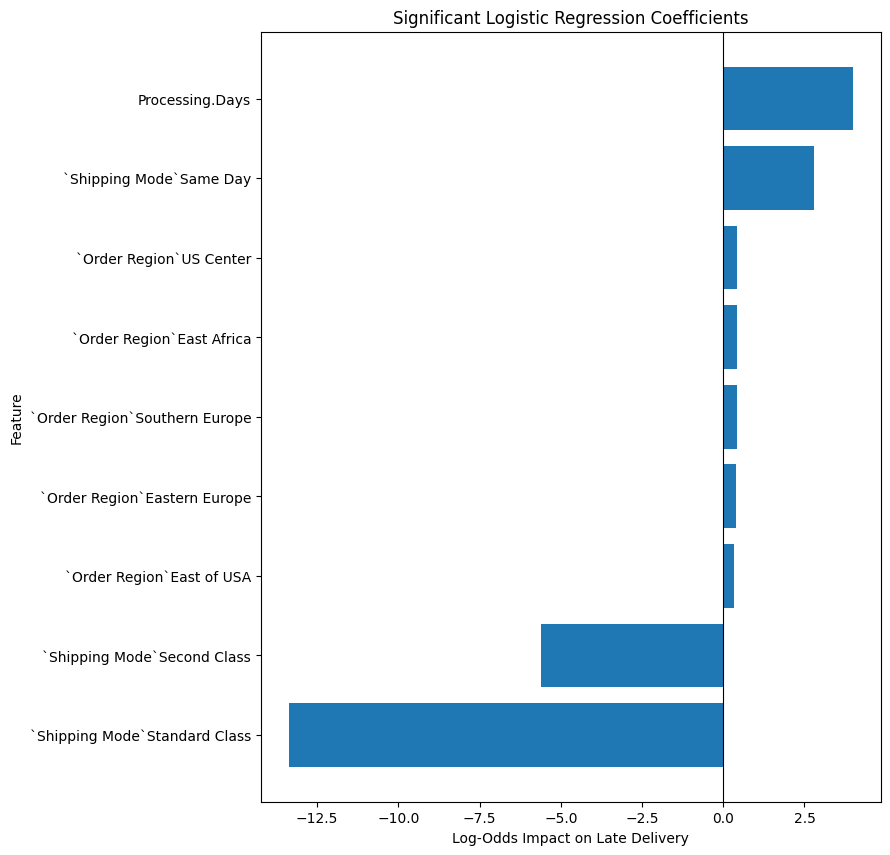

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    "Feature": result.params.index,
    "Coefficient": result.params.values,
    "p_value": result.pvalues.values
})

# Keep only significant variables
coef_df = coef_df[coef_df["p_value"] < 0.05]
coef_df = coef_df[coef_df["Feature"] != "const"]

coef_df = coef_df.sort_values("Coefficient")

plt.figure(figsize=(8, 10))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Significant Logistic Regression Coefficients")
plt.xlabel("Log-Odds Impact on Late Delivery")
plt.ylabel("Feature")
plt.show()


In [11]:
base_log_reg = LogisticRegression(
    penalty="l2",
    C=1.0,               # default strength of regularization
    class_weight="balanced",
    max_iter=1000,
    solver="lbfgs"       # works fine for L2 + many features
)

# Fit the base model
base_log_reg.fit(X_train, y_train)


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [12]:
y_pred = base_log_reg.predict(X_test)             # hard predictions (0/1)
y_proba = base_log_reg.predict_proba(X_test)[:, 1]  # probability of class 1 (Late)


In [13]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall    = recall_score(y_test, y_pred, pos_label=1)
f1        = f1_score(y_test, y_pred, pos_label=1)
roc_auc   = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression – Base Model ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred))


=== Logistic Regression – Base Model ===
Accuracy : 0.9508
Precision: 0.9573
Recall   : 0.9529
F1-score : 0.9551
ROC AUC  : 0.9726

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11064
           1       0.96      0.95      0.96     13448

    accuracy                           0.95     24512
   macro avg       0.95      0.95      0.95     24512
weighted avg       0.95      0.95      0.95     24512



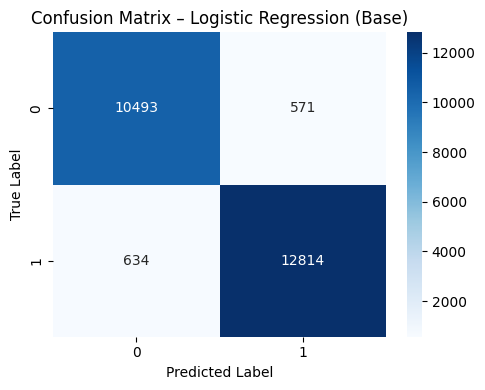

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression (Base)")
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

log_reg_for_cv = LogisticRegression(
    penalty="l2",
    class_weight="balanced",
    max_iter=1000,
    solver="lbfgs"
)

param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=log_reg_for_cv,
    param_grid=param_grid,
    scoring="f1",   # you could also use 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n=== Logistic Regression – Hyperparameter Tuning ===")
print("Best params:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)

best_log_reg = grid_search.best_estimator_

# Evaluate tuned model on test set
y_pred_tuned = best_log_reg.predict(X_test)
y_proba_tuned = best_log_reg.predict_proba(X_test)[:, 1]

accuracy_t  = accuracy_score(y_test, y_pred_tuned)
precision_t = precision_score(y_test, y_pred_tuned, pos_label=1)
recall_t    = recall_score(y_test, y_pred_tuned, pos_label=1)
f1_t        = f1_score(y_test, y_pred_tuned, pos_label=1)
roc_auc_t   = roc_auc_score(y_test, y_proba_tuned)

print("\n=== Logistic Regression – Tuned Model on Test Set ===")
print(f"Accuracy : {accuracy_t:.4f}")
print(f"Precision: {precision_t:.4f}")
print(f"Recall   : {recall_t:.4f}")
print(f"F1-score : {f1_t:.4f}")
print(f"ROC AUC  : {roc_auc_t:.4f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits

=== Logistic Regression – Hyperparameter Tuning ===
Best params: {'C': 10}
Best CV F1: 0.9561964617323225

=== Logistic Regression – Tuned Model on Test Set ===
Accuracy : 0.9508
Precision: 0.9571
Recall   : 0.9530
F1-score : 0.9551
ROC AUC  : 0.9727


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

# Define base Naive Bayes model
nb_base = GaussianNB()

# Fit on training data
nb_base.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_base.predict(X_test)
y_proba_nb = nb_base.predict_proba(X_test)[:, 1]  # probability of class 1 (Late)


In [17]:
# Define base Naive Bayes model
nb_base = GaussianNB()

# Fit on training data
nb_base.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_base.predict(X_test)
y_proba_nb = nb_base.predict_proba(X_test)[:, 1]  # probability of class 1 (Late)


In [18]:
accuracy_nb  = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label=1)
recall_nb    = recall_score(y_test, y_pred_nb, pos_label=1)
f1_nb        = f1_score(y_test, y_pred_nb, pos_label=1)
roc_auc_nb   = roc_auc_score(y_test, y_proba_nb)

print("=== Naive Bayes – Base Model (GaussianNB) ===")
print(f"Accuracy : {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall   : {recall_nb:.4f}")
print(f"F1-score : {f1_nb:.4f}")
print(f"ROC AUC  : {roc_auc_nb:.4f}")

print("\nClassification report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes – Base Model (GaussianNB) ===
Accuracy : 0.8989
Precision: 0.8920
Recall   : 0.9280
F1-score : 0.9097
ROC AUC  : 0.8980

Classification report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     11064
           1       0.89      0.93      0.91     13448

    accuracy                           0.90     24512
   macro avg       0.90      0.90      0.90     24512
weighted avg       0.90      0.90      0.90     24512



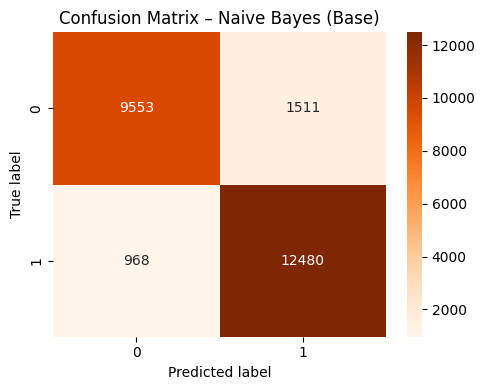

In [19]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix – Naive Bayes (Base)")
plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

nb_for_cv = GaussianNB()

param_grid_nb = {
    "var_smoothing": np.logspace(-12, -6, 7)  # 1e-12, 1e-11, ..., 1e-6
}

grid_search_nb = GridSearchCV(
    estimator=nb_for_cv,
    param_grid=param_grid_nb,
    scoring="f1",   # or 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_nb.fit(X_train, y_train)

print("\n=== Naive Bayes – Hyperparameter Tuning ===")
print("Best params:", grid_search_nb.best_params_)
print("Best CV F1:", grid_search_nb.best_score_)

best_nb = grid_search_nb.best_estimator_

# Evaluate tuned NB on test set
y_pred_nb_tuned = best_nb.predict(X_test)
y_proba_nb_tuned = best_nb.predict_proba(X_test)[:, 1]

accuracy_nb_t  = accuracy_score(y_test, y_pred_nb_tuned)
precision_nb_t = precision_score(y_test, y_pred_nb_tuned, pos_label=1)
recall_nb_t    = recall_score(y_test, y_pred_nb_tuned, pos_label=1)
f1_nb_t        = f1_score(y_test, y_pred_nb_tuned, pos_label=1)
roc_auc_nb_t   = roc_auc_score(y_test, y_proba_nb_tuned)

print("\n=== Naive Bayes – Tuned Model on Test Set ===")
print(f"Accuracy : {accuracy_nb_t:.4f}")
print(f"Precision: {precision_nb_t:.4f}")
print(f"Recall   : {recall_nb_t:.4f}")
print(f"F1-score : {f1_nb_t:.4f}")
print(f"ROC AUC  : {roc_auc_nb_t:.4f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits

=== Naive Bayes – Hyperparameter Tuning ===
Best params: {'var_smoothing': np.float64(1e-09)}
Best CV F1: 0.9102710450936028

=== Naive Bayes – Tuned Model on Test Set ===
Accuracy : 0.8989
Precision: 0.8920
Recall   : 0.9280
F1-score : 0.9097
ROC AUC  : 0.8980


In [21]:
import pandas as pd

results = pd.DataFrame({
    "Metric":    ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"],
    "Logistic":  [accuracy,   precision,   recall,   f1,         roc_auc],
    "NaiveBayes":[accuracy_nb, precision_nb, recall_nb, f1_nb,    roc_auc_nb]
})

results


,Metric,Logistic,NaiveBayes
0,Accuracy,0.950840,0.898866
1,Precision,0.957340,0.892002
2,Recall,0.952855,0.928019
3,F1-score,0.955093,0.909654
4,ROC AUC,0.972589,0.898048


In [22]:
results = pd.DataFrame({
    "Metric":          ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"],
    "Logistic_Base":   [accuracy,   precision,   recall,   f1,         roc_auc],
    "Logistic_Tuned":  [accuracy_t, precision_t, recall_t, f1_t,      roc_auc_t],
    "NB_Base":         [accuracy_nb, precision_nb, recall_nb, f1_nb,  roc_auc_nb],
    "NB_Tuned":        [accuracy_nb_t, precision_nb_t, recall_nb_t, f1_nb_t, roc_auc_nb_t]
})

results


,Metric,Logistic_Base,Logistic_Tuned,NB_Base,NB_Tuned
0,Accuracy,0.950840,0.950800,0.898866,0.898866
1,Precision,0.957340,0.957132,0.892002,0.892002
2,Recall,0.952855,0.953004,0.928019,0.928019
3,F1-score,0.955093,0.955064,0.909654,0.909654
4,ROC AUC,0.972589,0.972690,0.898048,0.898048


## Visualization

### Test-Set Performance: Logistic vs Naive Bayes

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

test_perf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"],
    "Logistic Regression": [accuracy_t, precision_t, recall_t, f1_t, roc_auc_t],
    "Naive Bayes": [accuracy_nb_t, precision_nb_t, recall_nb_t, f1_nb_t, roc_auc_nb_t]
})


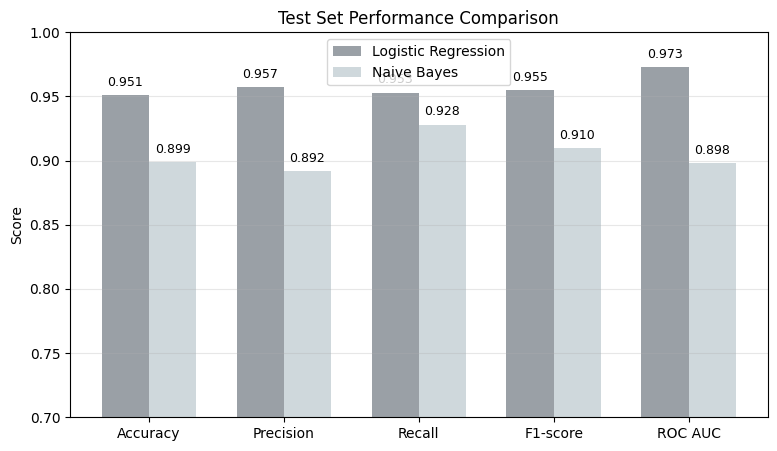

In [35]:
x = np.arange(len(test_perf["Metric"]))
width = 0.35

plt.figure(figsize=(9, 5))

bars1 = plt.bar(
    x - width/2,
    test_perf["Logistic Regression"],
    width,
    label="Logistic Regression",
    color="#9aa0a6"  # neutral grey
)

bars2 = plt.bar(
    x + width/2,
    test_perf["Naive Bayes"],
    width,
    label="Naive Bayes",
    color="#cfd8dc"  # light neutral
)

plt.xticks(x, test_perf["Metric"])
plt.ylabel("Score")
plt.title("Test Set Performance Comparison")
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(axis="y", alpha=0.3)



def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.005,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

add_labels(bars1)
add_labels(bars2)

plt.show()



### ROC Curve

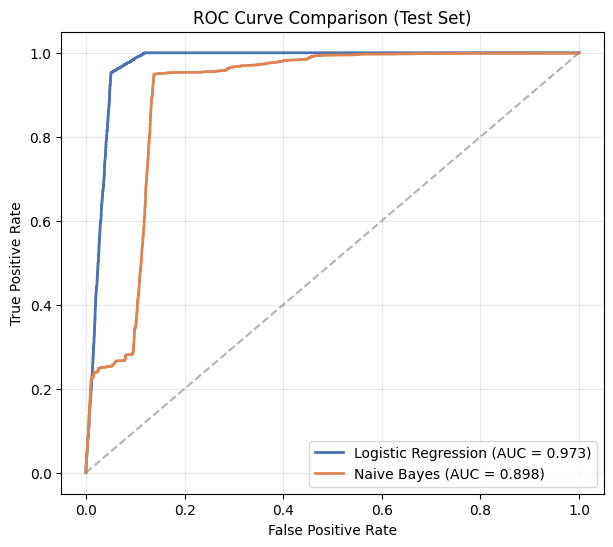

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Logistic Regression (base)
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba)

# Naive Bayes (tuned)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb_tuned)

plt.figure(figsize=(7, 6))

plt.plot(
    fpr_log, tpr_log,
    label=f"Logistic Regression (AUC = {roc_auc:.3f})",
    color="#4C72B0",   # muted blue
    linewidth=2
)

plt.plot(
    fpr_nb, tpr_nb,
    label=f"Naive Bayes (AUC = {roc_auc_nb_t:.3f})",
    color="#DD8452",   # muted orange
    linewidth=2
)

# Random baseline
plt.plot([0, 1], [0, 1],
         linestyle="--",
         color="gray",
         alpha=0.6)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Set)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


### Cross-Validation Performance Comparison (F1 score)

In [45]:
from sklearn.model_selection import cross_validate

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

# Logistic Regression (base)
cv_lr = cross_validate(
    base_log_reg,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Naive Bayes (tuned)
cv_nb = cross_validate(
    best_nb,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)


In [46]:
cv_results = {
    "ROC-AUC": [cv_lr["test_roc_auc"], cv_nb["test_roc_auc"]],
    "F1": [cv_lr["test_f1"], cv_nb["test_f1"]],
    "Accuracy": [cv_lr["test_accuracy"], cv_nb["test_accuracy"]],
    "Recall": [cv_lr["test_recall"], cv_nb["test_recall"]],
    "Precision": [cv_lr["test_precision"], cv_nb["test_precision"]],
}


C:\Users\HP\AppData\Local\Temp\ipykernel_26724\1355122667.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26724\1355122667.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26724\1355122667.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26724\1355122667.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].b

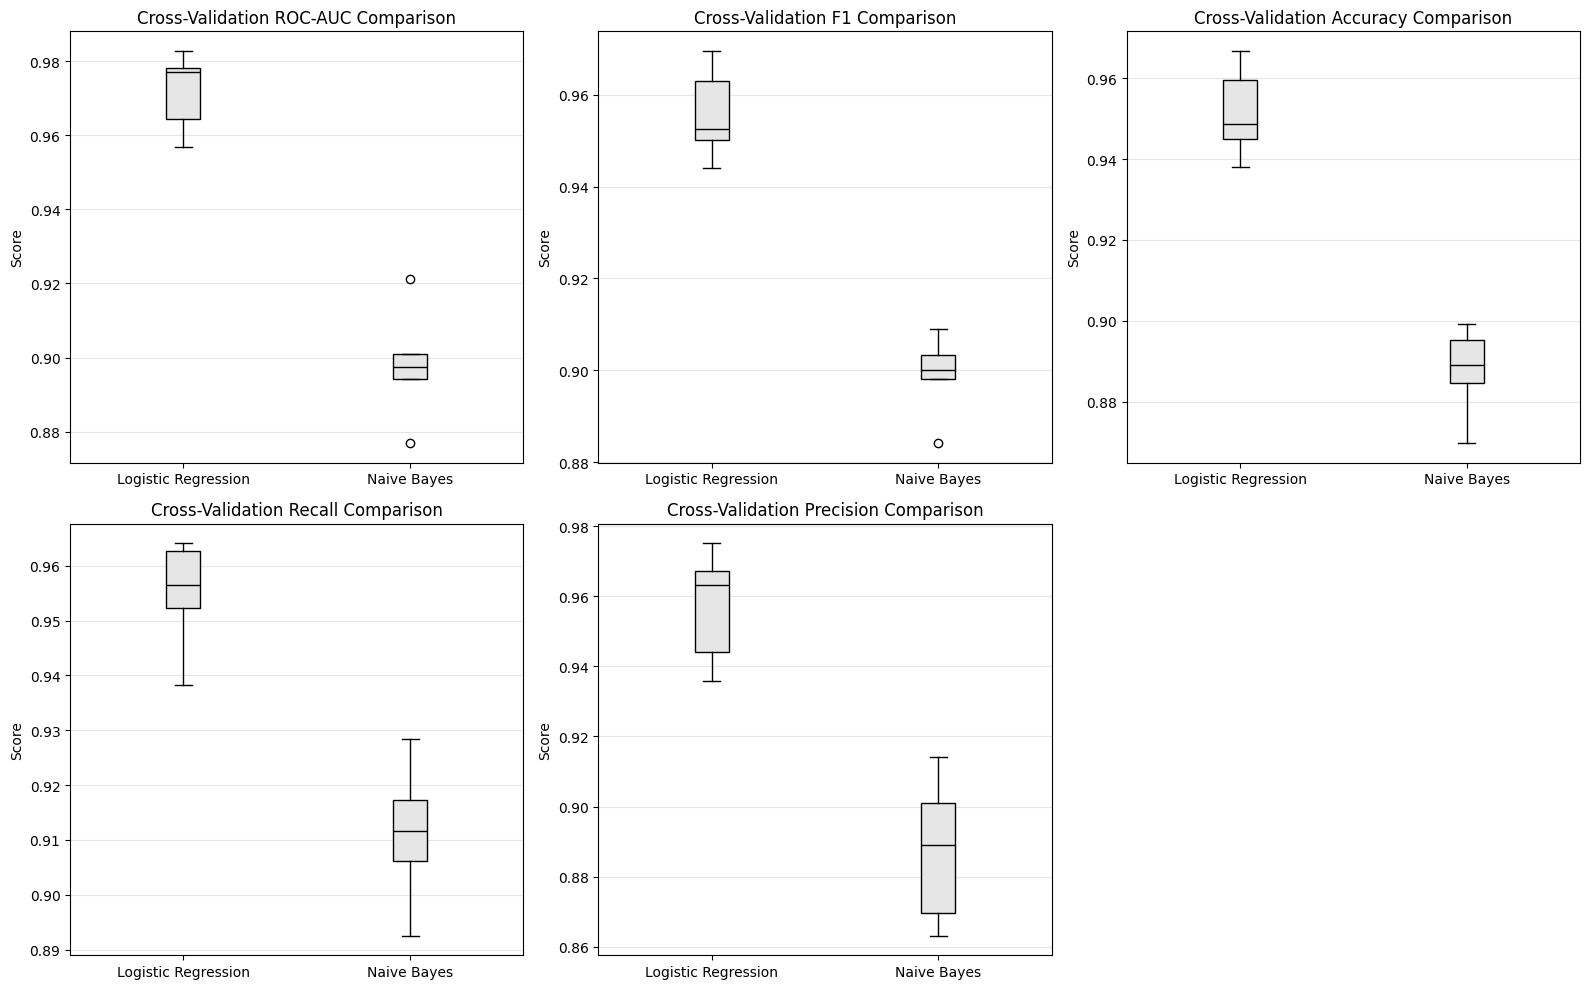

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, (metric, values) in enumerate(cv_results.items()):
    axes[i].boxplot(
        values,
        labels=["Logistic Regression", "Naive Bayes"],
        patch_artist=True,
        boxprops=dict(facecolor="#E6E6E6"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black")
    )
    axes[i].set_title(f"Cross-Validation {metric} Comparison")
    axes[i].set_ylabel("Score")
    axes[i].grid(axis="y", alpha=0.3)

# Remove unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
